## Modelo final

Teniendo en cuenta los resultados y las conclusiones de los anteriores notebooks, transformaremos a logaritmo el target Streams.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_df = pd.read_csv('../data/spotify_limpio_train.csv')

train_df.head()

,Artist,Track,Album,Album_type,Stream,Danceability,Energy,Key,Key_name,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Tempo_category,Duration_ms,Licensed,official_video
0,KAYTRANADA,LITE SPOTS,99.9%,album,29240851.0,0.884,0.549,1,C# / Db,-11.683,0.4710,0.03460,0.112,0.394,120.461,Moderato / Allegretto,230920.0,True,True
1,Rita Ora,Follow Me,Follow Me,single,82813284.0,0.673,0.729,6,F# / Gb,-4.879,0.0496,0.08300,0.100,0.675,122.023,Allegro,169672.0,True,True
2,Big Sean,Bounce Back,I Decided.,album,666145000.0,0.780,0.575,1,C# / Db,-5.628,0.1390,0.10600,0.129,0.273,81.502,Andante,222360.0,True,True
3,Dave Matthews Band,#41,Crash,album,34528391.0,0.577,0.726,4,E,-8.011,0.0299,0.00199,0.158,0.764,107.416,Andante,399800.0,True,True
4,Ray Dalton,Call It Love - Klingande Remix,Call It Love (Klingande Remix),single,1153344.0,0.671,0.687,10,A# / Bb,-8.669,0.0502,0.01110,0.504,0.623,121.992,Allegro,149508.0,True,True


In [2]:
train_df = train_df.drop(columns=[ 'Artist', 'Track', 'Album', 'Album_type', 'Key_name', 'Tempo_category'])

In [3]:
train_df["log_stream"] = np.log1p(train_df["Stream"])

In [4]:
train_df.head()

,Stream,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Licensed,official_video,log_stream
0,29240851.0,0.884,0.549,1,-11.683,0.4710,0.03460,0.112,0.394,120.461,230920.0,True,True,17.191077
1,82813284.0,0.673,0.729,6,-4.879,0.0496,0.08300,0.100,0.675,122.023,169672.0,True,True,18.232099
2,666145000.0,0.780,0.575,1,-5.628,0.1390,0.10600,0.129,0.273,81.502,222360.0,True,True,20.317018
3,34528391.0,0.577,0.726,4,-8.011,0.0299,0.00199,0.158,0.764,107.416,399800.0,True,True,17.357293
4,1153344.0,0.671,0.687,10,-8.669,0.0502,0.01110,0.504,0.623,121.992,149508.0,True,True,13.958177


In [5]:
import pandas as pd

X_train = train_df.drop(columns=['Stream', 'log_stream'], axis=1)
y_train = train_df[ 'log_stream']

Ahora, vamos a aplicar las transformaciones que hemos considerado al conjusto de test. Estas son: Eliminar las columnas con strings y las que se saben una vez se saca la canción (Views, comments...) y aplicar la transformacion logarítmica a Stream.

In [6]:
test_df = pd.read_csv('../data/spotify_test.csv')

test_df.head()


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,18320,Jessie Reyez,https://open.spotify.com/artist/3KedxarmBCyFBe...,FIGURES,Kiddo,album,spotify:track:3U3J5v3rkx89WnFEQvAJD5,0.600,0.13900,7.0,...,https://www.youtube.com/watch?v=wxLUj1Mrars,Jessie Reyez - Figures (Official Video),JessieReyezVEVO,105473489.0,1130146.0,23767.0,YESSIE – Out Now: https://JessieReyez.lnk.to/Y...,True,True,167619713.0
1,2828,Claude Debussy,https://open.spotify.com/artist/1Uff91EOsvd99r...,"Rêverie, L. 68",Debussy: Estampes; Pour le piano; 6 épigraphes...,album,spotify:track:086sjLPEqdKBgTxbTeCLCv,0.250,0.00904,5.0,...,https://www.youtube.com/watch?v=QRjllL-MP0U,Debussy - Rêverie,AleksandrSolzenicyn,15974768.0,107236.0,3080.0,"F. J. Thiollier, pianist",False,False,40399275.0
2,9119,Ben E. King,https://open.spotify.com/artist/3plJVWt88Eqjvt...,Spanish Harlem,Spanish Harlem,album,spotify:track:3UCmuRdeTriWgOZMEJsfqZ,0.608,0.59400,2.0,...,https://www.youtube.com/watch?v=DdZYUr-eJNc,Ben E King - Spanish Harlem (1961),YachtiCal Media,37204.0,572.0,23.0,Ben E King - Spanish Harlem (1961),False,False,18866293.0
3,6730,Kenny G,https://open.spotify.com/artist/6I3M904Y9IwgDj...,Sentimental,Breathless,album,spotify:track:5I7uF6AdRy5SbtHE6k1QJo,0.423,0.26900,8.0,...,https://www.youtube.com/watch?v=oHONFub5MPM,Kenny G - Sentimental,KennyGVEVO,15609999.0,57744.0,2695.0,Kenny G's official music video for 'Sentimenta...,True,True,10934323.0
4,2869,The Alchemist,https://open.spotify.com/artist/0eVyjRhzZKke2K...,Loose Change (feat. Earl Sweatshirt),This Thing Of Ours,album,spotify:track:2Z5MbKovyels3EXitye0eo,0.506,0.62800,9.0,...,https://www.youtube.com/watch?v=7z1WyqWaSYs,"The Alchemist - ""Loose Change"" feat. Earl Swea...",Al Chemist,1423560.0,62177.0,2552.0,Directed by Lonewolf\nfrom This Thing Of Ours ...,True,True,21176930.0


In [7]:
test_df = test_df.drop(columns=[ 'Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri','Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Instrumentalness'])

In [8]:
test_df["log_stream"] = np.log1p(test_df["Stream"])

In [9]:
X_test = test_df.drop(columns=['Stream', 'log_stream'], axis=1)
y_test = test_df['log_stream']

Random forest ha sido el algoritmo seleccionado, porque nos daba las mejores métricas

Aqui estamos probando el algoritmo GridSearchCV para encontrar los mejores hiperparámetros

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Modelo base
rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# Espacio de hiperparámetros
param_grid = {
    "n_estimators": np.arange(100, 600, 100),
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Grid Search + validación cruzada
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

print(f"Mejor RMSE CV: {-grid_search.best_score_:.4f}")

Mejores hiperparámetros:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': np.int64(500)}
Mejor RMSE CV: 1.4863


A continuación vamos a usar el código RandomizedSearchCV para ver los mejores hiperparámetros, para tener otra alternativa y compararlos

In [13]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": np.arange(100, 600, 100),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

print("Mejores hiperparámetros:")
print(random_search.best_params_)

print(f"Mejor RMSE CV: {-random_search.best_score_:.4f}")

Mejores hiperparámetros:
{'n_estimators': np.int64(500), 'min_samples_split': 2, 'max_depth': None}
Mejor RMSE CV: 1.4863


Vemos que usando GridSearch o RandomSearch los mejores hiperparámetros son n_estimators=500, max_depth=None y min_samples_split=2. Vamos a aplicar estos hiperparámetros a nuestro algoritmo de Random Forest

A continuación aplicamos el algoritmo Random forest a todo train.

## Random forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators = 500, max_depth = None, min_samples_split = 2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE (log): {rmse:.3f}")


RMSE (log): 1.504


Deshacemos la transformación del logaritmo.

In [15]:
y_test_real = np.exp(y_test)
y_pred_real = np.exp(y_pred)

rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae_real = mean_absolute_error(y_test_real, y_pred_real)

print(f"RMSE (streams): {rmse_real:,.0f}")

RMSE (streams): 250,623,558


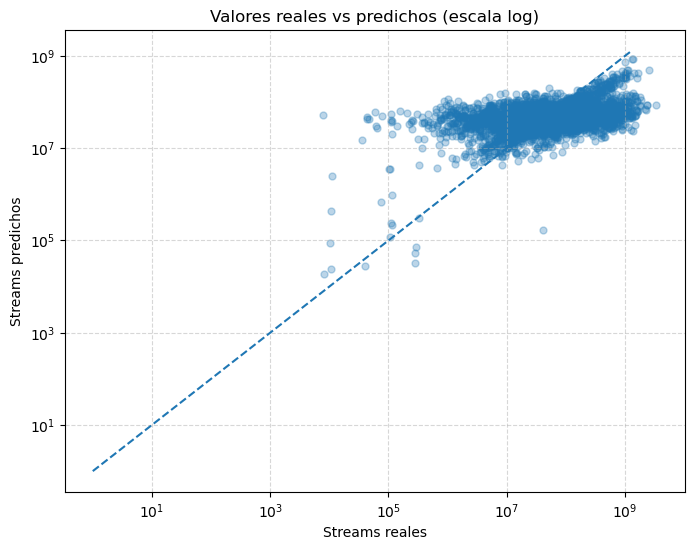

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.3, s=25)

max_val = np.percentile(y_test_real, 99)
plt.plot([1, max_val], [1, max_val], "--")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Streams reales")
plt.ylabel("Streams predichos")
plt.title("Valores reales vs predichos (escala log)")

plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()


## Modelo de negocio

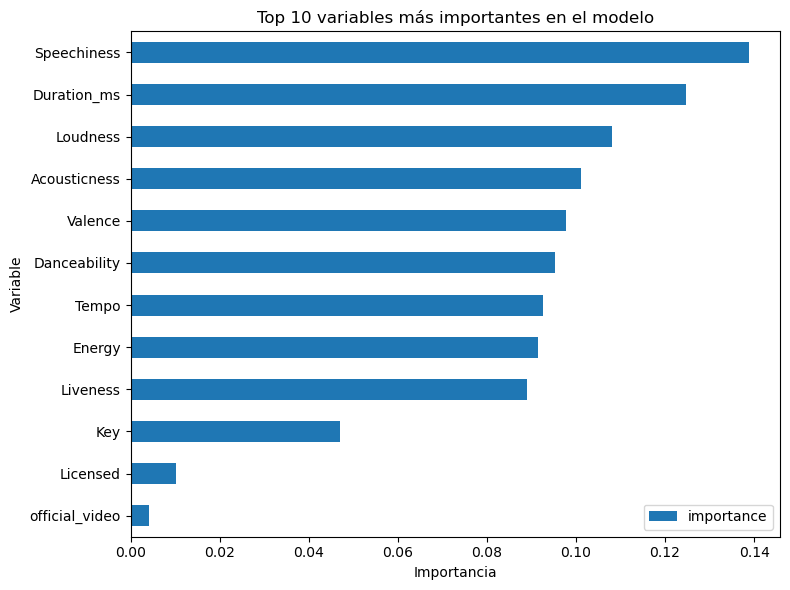

In [17]:
feat_imp_df = (
    pd.Series(model.feature_importances_, index=X_train.columns)
    .reset_index()
    .rename(columns={"index": "feature", 0: "importance"})
    .sort_values("importance")
)

feat_imp_df.plot.barh(
    x="feature",
    y="importance",
    figsize=(8,6)
)

plt.title("Top 10 variables más importantes en el modelo")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Vemos que las características que han tenido más relevancia en el modelo son: Speechiness, Duration_ms Loudness, Acousticness y Valence.

Para responder a las preguntas planteadas inicialmente de una manera legible, vamos a segmentar los datos en tres niveles de éxito (bajo, medio y alto). A partir de esta clasificación, se analiza cómo se distribuyen las distintas variables musicales dentro de cada uno de estos rangos con el objetivo de identificar patrones asociados al éxito de las canciones.

In [18]:
df_plot = train_df.copy() 

In [19]:
df_plot["success_group"] = pd.qcut(
    df_plot["Stream"],
    q=3,
    labels=["Bajo", "Medio", "Alto"]
)

<Figure size 640x480 with 0 Axes>

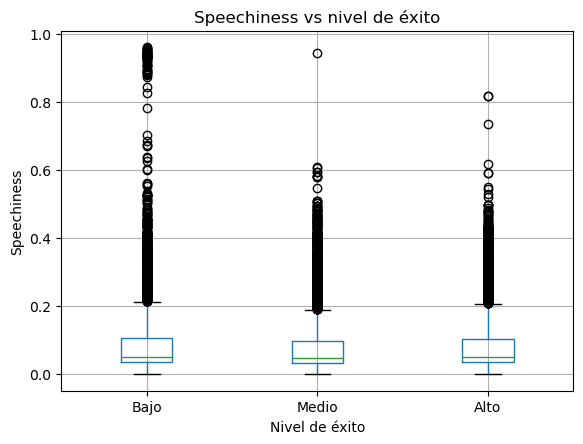

<Figure size 640x480 with 0 Axes>

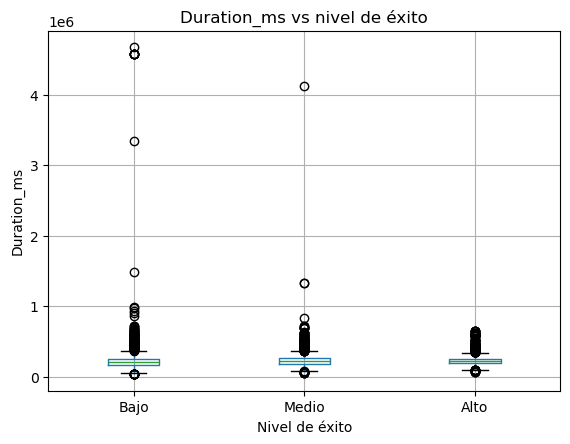

<Figure size 640x480 with 0 Axes>

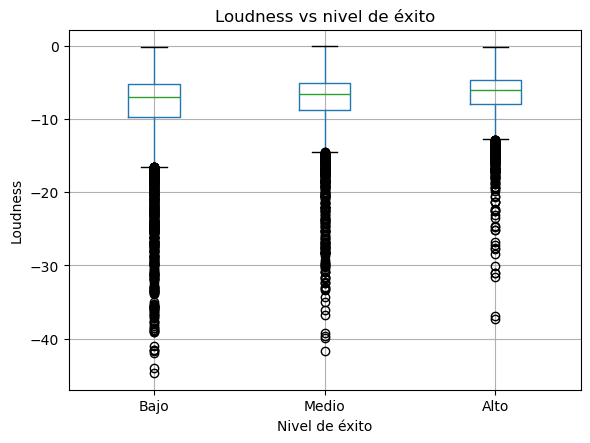

<Figure size 640x480 with 0 Axes>

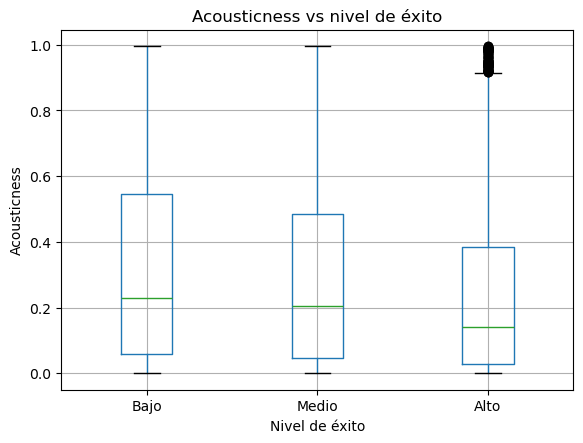

<Figure size 640x480 with 0 Axes>

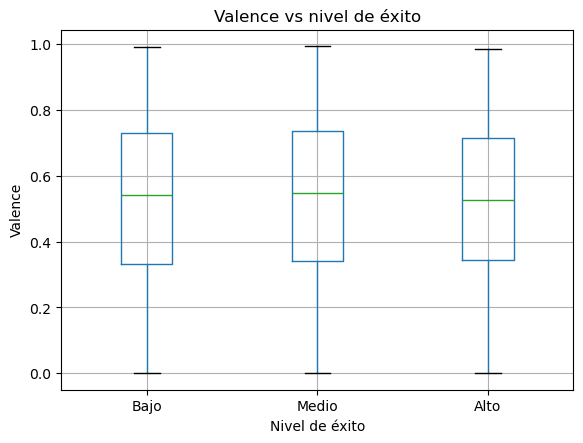

In [20]:
top_features = [
    "Speechiness",
    "Duration_ms",
    "Loudness",
    "Acousticness",
    "Valence"
]

for feature in top_features:
    plt.figure()
    df_plot.boxplot(column=feature, by="success_group")
    plt.title(f"{feature} vs nivel de éxito")
    plt.suptitle("")
    plt.xlabel("Nivel de éxito")
    plt.ylabel(feature)
    plt.show()

### Conclusiones de los gráficos: 
- Speechiness: A partir del análisis del box plot, se observa que las canciones con mayor nivel de éxito tienden a presentar valores de speechiness bajos, generalmente por debajo de 0.1. Aunque no existe un umbral exacto que garantice el éxito, valores elevados de speechiness (superiores a 0.3) aparecen con mayor frecuencia en canciones de bajo y medio éxito. Esto sugiere que un alto contenido de voz hablada reduce la probabilidad de alcanzar un éxito comercial elevado.

- Duration: El análisis del box plot de la duración muestra que no existe una relación directa entre la duración de una canción y su nivel de éxito. No obstante, las canciones más exitosas tienden a concentrarse en duraciones medias, generalmente entre 2,5 y 4 minutos, mientras que las duraciones extremas, especialmente las más largas, aparecen con mayor frecuencia en canciones de bajo éxito.

- Loudness: El análisis del box plot de loudness muestra que las canciones con mayor nivel de éxito tienden a presentar valores de loudness más elevados. En particular, las canciones de alto éxito se concentran mayoritariamente en un rango aproximado entre −8 dB y −4 dB, mientras que valores muy bajos de loudness aparecen con mayor frecuencia en canciones de bajo éxito. Esto sugiere que una mayor intensidad sonora está asociada a un mayor rendimiento comercial.

- Acousticness: El análisis del box plot de acousticness muestra que las canciones más exitosas tienden a presentar valores bajos de esta variable. En particular, las canciones de alto éxito se concentran mayoritariamente por debajo de 0.3, mientras que valores elevados de acousticness aparecen con mayor frecuencia en canciones de bajo y medio éxito. Esto sugiere que producciones menos acústicas y más procesadas suelen asociarse a un mayor rendimiento comercial.

- Valence: El análisis del box plot de valence muestra que no existe una relación directa entre esta variable y el nivel de éxito de una canción. No obstante, las canciones más exitosas tienden a concentrarse en valores intermedios de valence, evitando tanto valores muy bajos como muy altos. Esto sugiere que un equilibrio emocional puede favorecer una mayor aceptación comercial.

Con esta información podemos responder a nuestras preguntas iniciales. 

#### **¿Qué tipo de canciones conviene priorizar e invertir por parte de una discográfica?**

Conviene priorizar e invertir en canciones que presenten un perfil musical comercial y equilibrado. En particular, las canciones con mayor probabilidad de éxito tienden a mostrar un **loudness elevado** (aproximadamente entre −8 y −4 dB), **baja acousticness** (valores inferiores a 0.3), **baja speechiness** (por debajo de 0.1), una **duración media** (entre 2,5 y 4 minutos) y niveles de **valence intermedios** (entre 0.3 y 0.7).

#### **¿Qué características musicales se asocian a las canciones más exitosas?**

El análisis de las variables musicales muestra que las canciones más exitosas tienden a presentar una mayor **intensidad sonora**, lo que sugiere una producción más cuidada y profesional. Además, se observa una clara tendencia hacia **bajos niveles de acousticness**, indicando una preferencia por producciones menos acústicas y más procesadas. Asimismo, las canciones con **menor presencia de voz hablada** (baja speechiness) son más frecuentes en los niveles de mayor éxito. En cuanto a la duración, no se identifica una relación directa con el éxito, aunque las canciones extremadamente largas tienden a asociarse a niveles más bajos de popularidad. Por último, los niveles de **valence intermedios** parecen favorecer una mayor aceptación comercial frente a emociones extremas.

#### **¿Se puede predecir el éxito de una canción antes de su lanzamiento?**

Sí, es posible predecir parcialmente el éxito de una canción antes de su lanzamiento utilizando características musicales. Estas variables permiten estimar tendencias generales y diferenciar entre canciones con bajo, medio o alto potencial de éxito. Sin embargo, tanto el análisis exploratorio como el modelo predictivo muestran limitaciones a la hora de predecir éxitos extremos o fenómenos virales. Esto se debe a la influencia de factores externos no contemplados en el dataset, como estrategias de marketing, inclusión en playlists editoriales o popularidad previa del artista.